In [3]:
# VOC reactivity

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.style as style
import matplotlib.cm as cm
import statsmodels.formula.api as smf

%matplotlib inline
plt.rcParams.update({
    'font.family': 'Arial',
    'font.sans-serif': ['Arial']})

#load and prep data for plotting

dvoc1 = pd.read_csv("C:\\Users\\C837398661\\Desktop\\DECO_NMVOC_carbonyls_2012_2022.csv", #Denevr VOCs 
                 parse_dates=True,
                 index_col='Date')

pvoc1 = pd.read_csv("C:\\Users\\C837398661\\Desktop\\PVCO_NMVOC_carbonyls_2012_2022.csv", #Platteville VOCs 
                 parse_dates=True,
                 index_col='Date')

dvoc = dvoc1[(dvoc1.index.month >= 5) & (dvoc1.index.month <= 9)] #isolate May-September data
pvoc = pvoc1[(pvoc1.index.month >= 5) & (pvoc1.index.month <= 9)] #isolate May-September data

In [4]:
#make a dataframe that contains the VOC constants, use parts of Andrey's code

# a dictionary with rate constatnts for several noteable VOCs and OH
# note that I went back in and reformatted the titles to match the VOC dataframe I have - so that I can append the two together
#kOH  = {'Ethane': 0.248, 
#        'Propane': 1.09,
#        #'i_Butane': 2.12, #Isobutane
#        'n_Butane': 2.36,
#       #'i_Pentane': 3.6, #Isopentane
#        'n_Pentane': 3.8,
#        'Cyclopentane': 4.97,
#        'n_Hexane': 5.2,
#        'Cyclohexane': 6.97,
#        '2_3_Dimethylpentane': 6.47,
#        '2_4_Dimethylpentane': 4.77,
#        'n_Heptane': 6.76,
#        'Methylcyclohexane': 9.64,
#        '2_2_4_Trimethylpentane': 3.34,
#        '2_3_4_Trimethylpentane': 6.6,
#        '2_Methylhexane': 6.72,
#        '3_Methylhexane': 7,
#        '2_Methylheptane': 9.1,
#        '3_Methylheptane': 8.57,
#        'n_Octane': 8.11,
#        'n_Nonane': 9.7,
#        'n_Decane': 11,
#       # 'Ethene': 8.52,
#       # 'Propene': 26.3,
#        '1_Butene': 31.4,
#        't_2_Butene': 64,
#        'c_2_Butene': 56.4,
#        '1_Pentene': 31.4,
#        't_2_Pentene': 67,
#        'c_2_Pentene': 65,
#        'Isoprene': 100,
#        'Ethyne': 0.88, #Acetylene
#        'Benzene': 1.22,
#        'Toluene': 5.63,
#        'Ethylbenzene': 7,
#        'm_p_Xylene': 18.7,
#        'o_Xylene': 13.6,
#        'Styrene': 58,
#        'i_Propylbenzene': 6.3, #Isopropylbenzene
#        'n_Propylbenzene': 5.8,
#       # '2_Ethyltoluene': 11.9, #o-Ethyltoluene
#       # '3_Ethyltoluene': 18.6, #m-Ethyltoluene
#       # '4_Ethyltoluene': 11.8, #p-Ethyltoluene
#        '1_2_3_Trimethylbenzene': 32.7,
#        '1_2_4_Trimethylbenzene': 32.5,
#        '1_3_5_Trimethylbenzene': 56.7,
#        '1_3_Diethylbenzene': 22, #m-Diethylbenzene
#        '1_4_Diethylbenzene': 16, #p-Diethylbenzene
# #       'c2hcl3 (pptv)': 1.97, #deal with these later
# #       'c2cl4 (pptv)': 0.151,
#        #'Acetonitrile': 0.024
#       
#        #add in some other stuff: 'Methylcyclohexane', 'Methylcyclopentane, 'Propylene', 'Acetone', 'Fromaldehyde', 'Acetaldehyde', 'Benzaldehyde'
#}

#convert dictionary into dataframe
#constans = pd.DataFrame(kOH.items(), columns=['Compound', 'OH Rate Constant'])

#transpose constants matrix
#constants = constans.T

#push first row of dataframe into a label position instead of actual data
#constants.columns = constants.iloc[0]
#constants = constants[1:]

#type(constants)
#constants

In [5]:
#make a dataframe that contains the VOC constants, use parts of Andrey's code

# a dictionary with rate constatnts for several noteable VOCs and OH
# note that I went back in and reformatted the titles to match the VOC dataframe I have - so that I can append the two together
# replace _ with -, t with trans, _ with ,, c with cis ,, 2 with o, 3 with m, 4 with p etc.
# add in some other stuff: 'Methylcyclohexane', 'Methylcyclopentane, 'Propylene', 'Acetone', 'Fromaldehyde', 'Acetaldehyde', 'Benzaldehyde'
# find rate constants for new additions : use ACS paper "Atmospheric Degredation of Volitile Organic Compounds"


kOH  = {'Ethane': 0.248, 
        'Propane': 1.09,
        'Isobutane': 2.12, #i_Butane
        'n-Butane': 2.36,
        'Isopentane': 3.6, #i_Pentane 
        'n-Pentane': 3.8,
        'Cyclopentane': 4.97,
        'n-Hexane': 5.2,
        'Cyclohexane': 6.97,
        '2,3-Dimethylpentane': 6.47,
        '2,4-Dimethylpentane': 4.77,
        'n-Heptane': 6.76,
        'Methylcyclohexane': 9.64,
        '2,2,4-Trimethylpentane': 3.34,
        '2,3,4-Trimethylpentane': 6.6,
        '2-Methylhexane': 6.72,
        '3-Methylhexane': 7,
        '2-Methylheptane': 9.1,
        '3-Methylheptane': 8.57,
        'n-Octane': 8.11,
        'n-Nonane': 9.7,
        'n-Decane': 11,
        'Ethylene': 8.52, #Ethene
        'Propylene': 26.3, #Propene
        '1-Butene': 31.4,
        'trans-2-Butene': 64,
        'cis-2-Butene': 56.4,
        '1-Pentene': 31.4,
        'trans-2-Pentene': 67,
        'cis-2-Pentene': 65,
        'Isoprene': 100,
        'Acetylene': 0.88, #Ethyne
        'Benzene': 1.22,
        'Toluene': 5.63,
        'Ethylbenzene': 7,
        'm-Xylene/p-Xylene': 18.7, #m_p_Xylene
        'o-Xylene': 13.6,
        'Styrene': 58,
        'Isoropylbenzene': 6.3, #i_Propylbenzene
        'n-Propylbenzene': 5.8,
        'o-Ethyltoluene': 11.9, #2_Ethyltoluene
        'm-Ethyltoluene': 18.6, #3_Ethyltoluene
        'p-Ethyltoluene': 11.8, #4_Ethyltoluene
        '1,2,3-Trimethylbenzene': 32.7,
        '1,2,4-Trimethylbenzene': 32.5,
        '1,3,5-Trimethylbenzene': 56.7,
        'm-Diethylbenzene': 22, #1_3_Diethylbenzene
        'p-Diethylbenzene': 16, #1_4_Diethylbenzene
 #       'c2hcl3 (pptv)': 1.97, #deal with these later
 #       'c2cl4 (pptv)': 0.151,
        #'Acetonitrile': 0.024
        'Methylcyclohexane': 9.64, 
        # 'Methylcyclopentane': , # can't find and/or is wrong, check out later
        'Acetone': 0.17, #see above
        'Fromaldehyde': 9.37, 
        'Acetaldehyde': 15, 
        'Benzaldehyde': 12,
        'Propionaldehyde': 20, #Propanal
        '2-Butanone': 1.22 
}

#convert dictionary into dataframe
constans = pd.DataFrame(kOH.items(), columns=['Compound', 'OH Rate Constant'])

#transpose constants matrix
constants = constans.T

#push first row of dataframe into a label position instead of actual data
constants.columns = constants.iloc[0]
constants = constants[1:]

#type(constants)
constants

Compound,Ethane,Propane,Isobutane,n-Butane,Isopentane,n-Pentane,Cyclopentane,n-Hexane,Cyclohexane,"2,3-Dimethylpentane",...,"1,2,4-Trimethylbenzene","1,3,5-Trimethylbenzene",m-Diethylbenzene,p-Diethylbenzene,Acetone,Fromaldehyde,Acetaldehyde,Benzaldehyde,Propionaldehyde,2-Butanone
OH Rate Constant,0.248,1.09,2.12,2.36,3.6,3.8,4.97,5.2,6.97,6.47,...,32.5,56.7,22.0,16.0,0.17,9.37,15.0,12.0,20.0,1.22


In [6]:
dvoc

,"1,2,3-Trimethylbenzene","1,2,4-Trimethylbenzene","1,3,5-Trimethylbenzene","1,3-Butadiene",1-Decene,1-Dodecene,1-Heptene,1-Hexene,1-Nonene,1-Octene,...,Nonane,TNMHC (ppbC),Total PAMS (ppbC),alpha-Pinene,beta-Pinene,m/p-Xylenes,Acrolein,MEK_&_Butyraldehyde,Methacrolein,m-Tolualdehyde
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-03,0.034667,0.550,0.166000,0.270000,0.071667,0.127667,0.0750,0.114,0.062333,0.070667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-06,0.034667,0.222,0.039667,0.066333,0.071667,0.127667,0.0750,0.114,0.062333,0.070667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-09,0.034667,0.642,0.305000,0.270000,0.071667,0.127667,0.0750,0.114,0.062333,0.070667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-12,0.281000,0.698,0.039667,0.204000,0.071667,0.127667,0.3270,0.114,0.062333,0.070667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-15,0.172000,0.946,0.347000,0.457000,0.071667,0.127667,NaN,0.114,0.062333,0.070667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,0.427000,1.900,0.714000,NaN,NaN,0.182667,NaN,0.269,0.337000,0.301000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-08,0.280000,1.360,0.471000,NaN,NaN,0.182667,0.5490,0.392,0.379000,0.359000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-14,0.228500,1.300,0.455000,0.246000,NaN,0.182667,0.4195,0.292,0.296500,0.267000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
len(compounds)

50

In [7]:
#first workup devnver VOCs

#denver VOC dataframe with all VOCs present
dvoc

#list of all noteable VOCS
# compounds = ['Ethane', 'Propane', 'n-Butane', 'n-Pentane', 'Cyclopentane', 'n_Hexane', 'Cyclohexane', '2,3-Dimethylpentane', 
#             '2_4_Dimethylpentane', 'n_Heptane', 'Methylcyclohexane', '2_2_4_Trimethylpentane', '2_3_4_Trimethylpentane', '2_Methylhexane', '3_Methylhexane', 
#             '2_Methylheptane', '3_Methylheptane', 'n_Octane', 'n_Nonane', 'n_Decane', 'Ethene', 'Propene', '1_Butene', 't_2_Butene', 'c_2_Butene', '1_Pentene', 
#             't_2_Pent/ene', 'c_2_Pentene', 'Isoprene', 'Ethyne', 'Benzene', 'Toluene', 'Ethylbenzene', 'm_p_Xylene', 'o_Xylene', 'Styrene', 'i_Propylbenzene', 
#             'n_Propylbenzene', '2_Ethyltoluene', '3_Ethyltoluene', '4_Ethyltoluene', '1_2_3_Trimethylbenzene', '1_2_4_Trimethylbenzene', '1_3_5_Trimethylbenzene', 
#             '1_3_Diethylbenzene', '1_4_Diethylbenzene', 'Acetonitrile']
#reformat the list
#replace _ with -, t with trans, _ with ,, c with cis ,, 2 with o, 3 with m, 4 with p etc.
#add some more, including oxidzed (oxygenated?) - carbonyls and/or with concentrations above ~1
    #nonoxygenated: 'Methylcyclohexane', 'Methylcyclopentane, 'Propylene'
    #oxygenated: 'Acetone', 'Fromaldehyde', 'Acetaldehyde', 'Benzaldehyde'
compounds = ['Ethane', 'Propane', 'Isobutane', 'n-Butane', 'Isopentane', 'n-Pentane', 'Cyclopentane', 'n-Hexane', 'Cyclohexane', '2,3-Dimethylpentane', '2,4-Dimethylpentane', 'n-Heptane', 
             'Methylcyclohexane', '2,2,4-Trimethylpentane', '2,3,4-Trimethylpentane', '2-Methylhexane', '3-Methylhexane', '2-Methylheptane', '3-Methylheptane', 
             'n-Octane', 'n-Nonane', 'n-Decane', 'Ethylene', 'Propylene', '1-Butene', 'trans-2-Butene', 'cis-2-Butene', '1-Pentene', 'trans-2-Pentene', 'cis-2-Pentene', 'Isoprene', 'Acetylene', 'Benzene',
             'Toluene', 'Ethylbenzene', 'm-Xylene/p-Xylene', 'o-Xylene', 'Styrene', 'Isopropylbenzene', 'n-Propylbenzene', 'o-Ethyltoluene', 'm-Ethyltoluene', 'p-Ethyltoluene',
             '1,2,3-Trimethylbenzene', '1,2,4-Trimethylbenzene', '1,3,5-Trimethylbenzene', 'm-Diethylbenzene', 'p-Diethylbenzene', 'Methylcyclohexane',
             'Propylene']
              # 'Acetone', 'Formaldehyde', 'Acetaldehyde', 'Benzaldehyde', 'Propionaldehyde', '2-Butanone']

#create new denver VOC by eliminating all VOCs that are not the noteable ones
newdvoc = dvoc[compounds]

#test
#newdvoc
#these values show all the raw data for the selected columns in the preestablished timeframe

#convert ppbv values to reactivity - mixing ratio to number density (molecule/cm3)
# create conversion function 
# 1) Establish your variables, use STP
p = 850 #atmosphere
T = 298 #Kelvin
# x = dataframe value?  x = dvocr[col]
k_B = 8.31/6.02e23 #universal gas constant/avagadro's number
# mixing ratio (mr) to (2) number density (nden)
def mr2nden(x, p, T): # 2) in this line of the function you establish how many variables you will use and give them a place to be applued (in the parenthases)
    return (x*(1e-9)) * (p*100) / k_B/ T * 1e-6 # 3) here is where you craft your function
#is this the right math?

#denver VOC radical
dvocr = newdvoc.copy()
for col in newdvoc:
    if col in kOH:
        #apply conversion function
        dvocr[col] = mr2nden(dvocr[col], T, p) #are we using STP or room temp? 298
        # calculate OH reactivity : kOH * nden
        dvocr[col] = dvocr[col]*(kOH[col]*(1e-12))

#test
dvocr
#these values are now different from the intial values in the dataframe

#add all reactivities together for each day
dvocr['Total Reactivities Sum'] = dvocr.sum(axis=1) #adds another column with the total sums on the end
# test
dvocr
# last column with sums appears

#remove all comuns that aren't the date or total reactivity sums
dsums = [col for col in dvocr.columns if any(x in col for x in ['Total Reactivities Sum', 'Date'])] #why is x in xol for x in needed? 
dvocrsums = dvocr[dsums]
#test
dvocrsums
#two columns with date and sums appear

,Total Reactivities Sum
Date,
2012-05-03,0.978627
2012-05-06,0.477912
2012-05-09,0.889159
2012-05-12,1.004765
2012-05-15,1.500692
...,...
2022-09-02,1.854490
2022-09-08,1.437928
2022-09-14,1.412294


<Axes: xlabel='Date'>

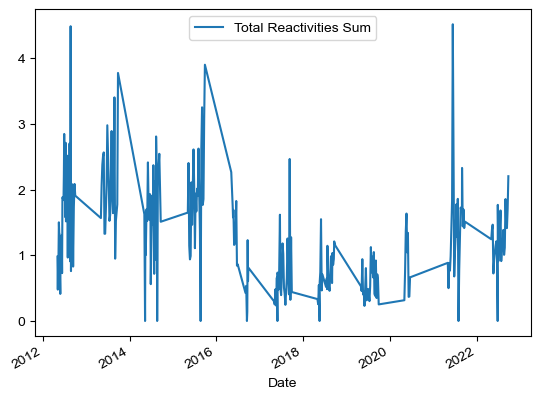

In [8]:
dvocrsums.plot()

<Axes: xlabel='Date'>

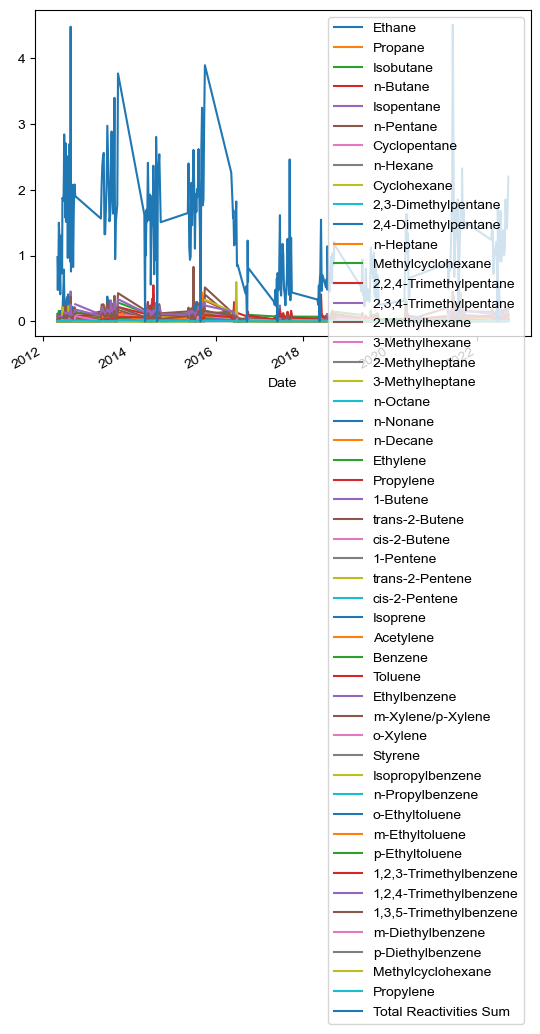

In [9]:
dvocr.plot()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\373018227.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)


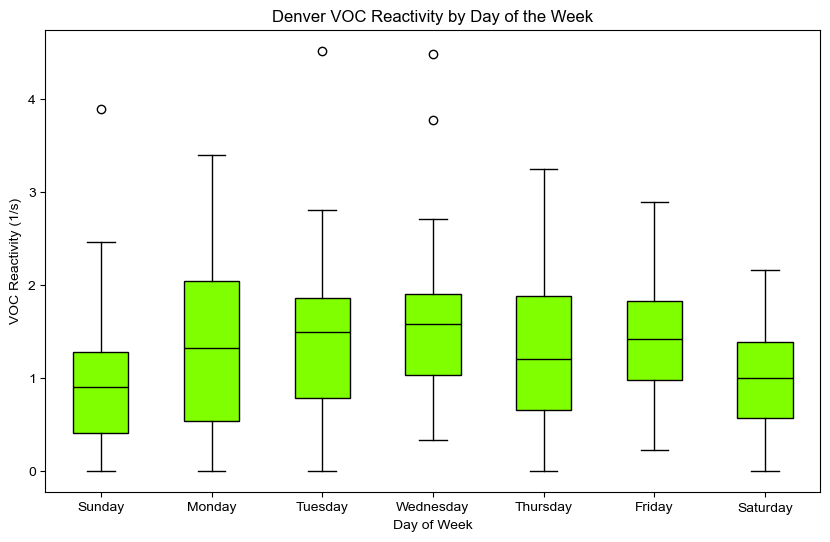

In [10]:
#plot day of week plot for denver VOC reactivities

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 3rd 2005 was a Tuesday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
dvocrsums

labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

grouped = dvocrsums['Total Reactivities Sum'].groupby(dvocrsums['dayofweek']).apply(np.array) 
#grouped = grouped.apply(remove_nans)

plt.figure(figsize=(10, 6))  

plt.boxplot(grouped, patch_artist = True, boxprops = dict(facecolor = "chartreuse"), medianprops = dict(color = "black"));
plt.xticks(np.arange(1, 8), labels) #makes an array 1 - 7, and matches labels to it

plt.xlabel('Day of Week')
plt.ylabel('VOC Reactivity (1/s)')
#plt.ylim(0, 40000)
plt.title('Denver VOC Reactivity by Day of the Week')
plt.grid(False)
plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\1388283342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)


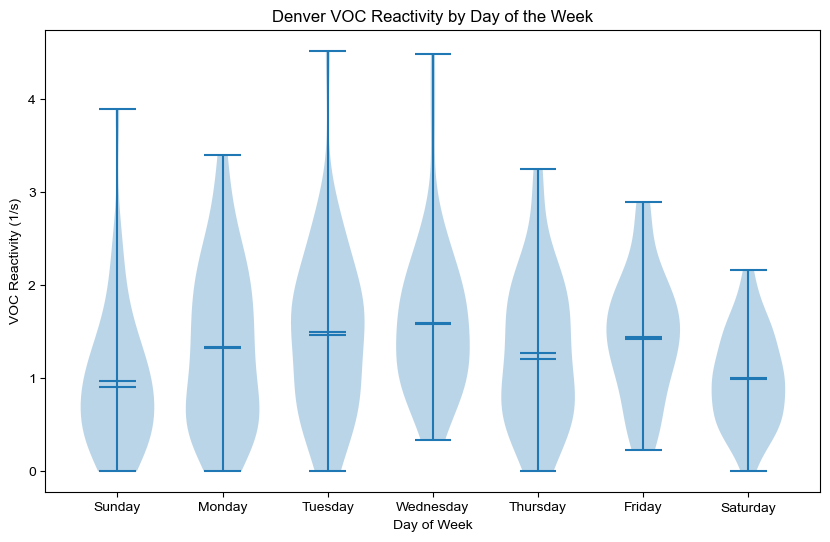

In [11]:
#plot day of week plot for denver VOC reactivities

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 3rd 2005 was a Tuesday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
dvocrsums

labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

grouped = dvocrsums['Total Reactivities Sum'].groupby(dvocrsums['dayofweek']).apply(np.array) 
#grouped = grouped.apply(remove_nans)

plt.figure(figsize=(10, 6))  

plt.violinplot(grouped,points=60, widths=0.7, showmeans=True, showextrema=True, showmedians=True, bw_method=0.5);
plt.xticks(np.arange(1, 8), labels) #makes an array 1 - 7, and matches labels to it

plt.xlabel('Day of Week')
plt.ylabel('VOC Reactivity (1/s)')
#plt.ylim(0, 40000)
plt.title('Denver VOC Reactivity by Day of the Week')
plt.grid(False)
plt.show()

In [12]:
grouped

dayofweek
0    [0.47791167047774974, 0.4121424802056902, 1.57...
1    [1.3184778790741218, 0.7284995768379133, 2.103...
2    [1.5006921366561874, 0.7723169348199213, 2.211...
3    [0.8891593124808911, 1.1688834271217847, 2.710...
4    [0.9786266944698092, 0.6609412883270541, 1.881...
5    [1.340846515085482, 1.3042931858083646, 2.8450...
6    [1.0047651703624825, 1.0875379879040699, 1.838...
Name: Total Reactivities Sum, dtype: object

In [13]:
#repeat workup for platteville VOCs

#platteville VOC dataframe with all VOCs present
pvoc

#list of all noteable VOCS
# compounds = ['Ethane', 'Propane', 'Isobutane', 'n-Butane', 'Isopentane', 'n-Pentane', 'Cyclopentane', 'n-Hexane', 'Cyclohexane', '2,3-Dimethylpentane', '2,4-Dimethylpentane', 'n-Heptane', 
#              'Methylcyclohexane', '2,2,4-Trimethylpentane', '2,3,4-Trimethylpentane', '2-Methylhexane', '3-Methylhexane', '2-Methylheptane', '3-Methylheptane', 
#              'n-Octane', 'n-Nonane', 'n-Decane', 'Ethylene', 'Propylene', '1-Butene', 'trans-2-Butene', 'cis-2-Butene', '1-Pentene', 'trans-2-Pentene', 'cis-2-Pentene', 'Isoprene', 'Acetylene', 'Benzene',
#              'Toluene', 'Ethylbenzene', 'm-Xylene/p-Xylene', 'o-Xylene', 'Styrene', 'Isopropylbenzene', 'n-Propylbenzene', 'o-Ethyltoluene', 'm-Ethyltoluene', 'p-Ethyltoluene',
#              '1,2,3-Trimethylbenzene', '1,2,4-Trimethylbenzene', '1,3,5-Trimethylbenzene', 'm-Diethylbenzene', 'p-Diethylbenzene', 'Methylcyclohexane', 'Methylcyclopentane', 
#              'Propylene', 'Acetone', 'Formaldehyde', 'Acetaldehyde', 'Benzaldehyde', 'Propionaldehyde', '2-Butanone']

compounds = ['Ethane', 'Propane', 'Isobutane', 'n-Butane', 'Isopentane', 'n-Pentane', 'Cyclopentane', 'n-Hexane', 'Cyclohexane', '2,3-Dimethylpentane', '2,4-Dimethylpentane', 'n-Heptane', 
             'Methylcyclohexane', '2,2,4-Trimethylpentane', '2,3,4-Trimethylpentane', '2-Methylhexane', '3-Methylhexane', '2-Methylheptane', '3-Methylheptane', 
             'n-Octane', 'n-Nonane', 'n-Decane', 'Ethylene', 'Propylene', '1-Butene', 'trans-2-Butene', 'cis-2-Butene', '1-Pentene', 'trans-2-Pentene', 'cis-2-Pentene', 'Isoprene', 'Acetylene', 'Benzene',
             'Toluene', 'Ethylbenzene', 'm-Xylene/p-Xylene', 'o-Xylene', 'Styrene', 'Isopropylbenzene', 'n-Propylbenzene', 'o-Ethyltoluene', 'm-Ethyltoluene', 'p-Ethyltoluene',
             '1,2,3-Trimethylbenzene', '1,2,4-Trimethylbenzene', '1,3,5-Trimethylbenzene', 'm-Diethylbenzene', 'p-Diethylbenzene', 'Methylcyclohexane',
             'Propylene']

#create new platteville VOC by eliminating all VOCs that are not the noteable ones
newpvoc = pvoc[compounds]

#plateville VOC radical
#use mole ratio to number density formula from before
pvocr = newpvoc.copy()
for col in newpvoc:
    if col in kOH:
        #apply conversion function
        pvocr[col] = mr2nden(pvocr[col], T, p) #are we using STP or room temp? 298
        # calculate OH reactivity : kOH * nden
        pvocr[col] = pvocr[col]*(kOH[col]*(1e-12))


#add all reactivities together for each day
pvocr['Total Reactivities Sum'] = pvocr.sum(axis=1) #adds another column with the total sums on the end

#remove all comuns that aren't the date or total reactivity sums
psums = [col for col in pvocr.columns if any(x in col for x in ['Total Reactivities Sum', 'Date'])] #why is x in xol for x in needed? 
pvocrsums = pvocr[psums]
#test
pvocrsums
#two columns with date and sums appear

,Total Reactivities Sum
Date,
2012-05-03,5.364919
2012-05-06,1.442600
2012-05-09,4.014371
2012-05-12,1.237985
2012-05-15,5.159831
...,...
2022-09-11,0.869720
2022-09-14,1.118070
2022-09-17,1.848857


C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\3700694586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)


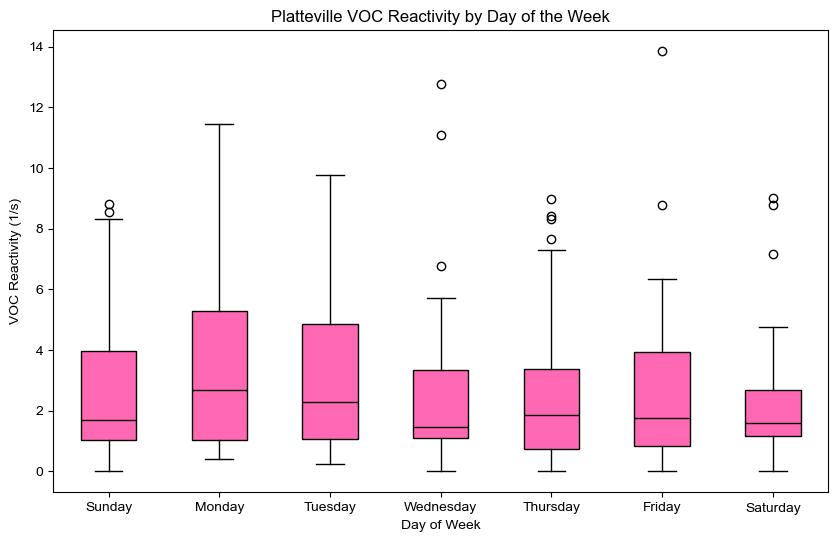

In [14]:
#plot day of week plot for plateville VOC reactivities

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 3rd 2005 was a Tuesday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)
pvocrsums

labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

pgrouped = pvocrsums['Total Reactivities Sum'].groupby(pvocrsums['dayofweek']).apply(np.array) 
#grouped = grouped.apply(remove_nans)

plt.figure(figsize=(10, 6))  

plt.boxplot(pgrouped, patch_artist = True, boxprops = dict(facecolor = "hotpink"), medianprops = dict(color = "black"));
plt.xticks(np.arange(1, 8), labels) #makes an array 1 - 7, and matches labels to it

plt.xlabel('Day of Week')
plt.ylabel('VOC Reactivity (1/s)')
#plt.ylim(0, 70000)
plt.title('Platteville VOC Reactivity by Day of the Week')
plt.grid(False)
plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\1911013119.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)


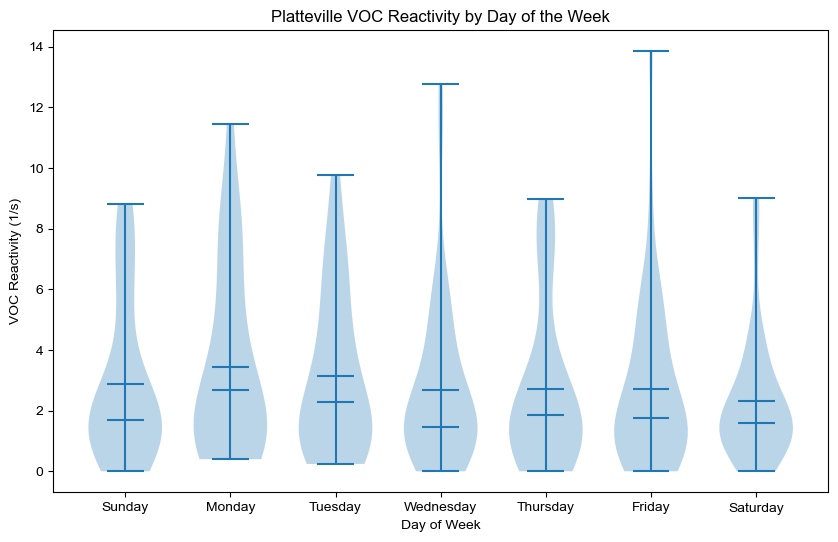

In [15]:
#plot day of week plot for plateville VOC reactivities

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 3rd 2005 was a Tuesday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)
pvocrsums

labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

pgrouped = pvocrsums['Total Reactivities Sum'].groupby(pvocrsums['dayofweek']).apply(np.array) 
#grouped = grouped.apply(remove_nans)

plt.figure(figsize=(10, 6))  

plt.violinplot(pgrouped, points=60, widths=0.7, showmeans=True, showextrema=True, showmedians=True, bw_method=0.5);
plt.xticks(np.arange(1, 8), labels) #makes an array 1 - 7, and matches labels to it

plt.xlabel('Day of Week')
plt.ylabel('VOC Reactivity (1/s)')
#plt.ylim(0, 70000)
plt.title('Platteville VOC Reactivity by Day of the Week')
plt.grid(False)
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

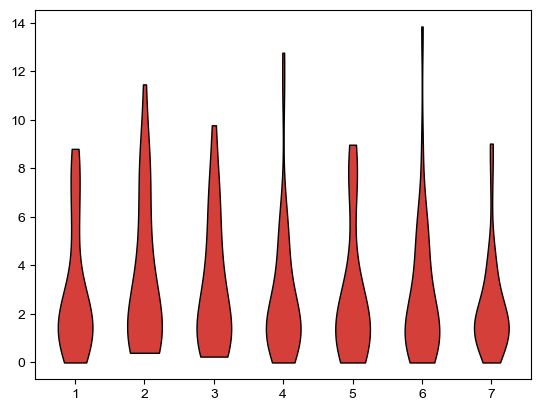

In [16]:

#plt.set_title('Customized violin plot')
parts = plt.violinplot(pgrouped, showmeans=False, showmedians=False, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(pgrouped, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(pgrouped, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
plt.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


In [17]:
pgrouped

dayofweek
0    [1.44260011578618, 2.596355460312082, 6.217641...
1    [5.744564182582806, 8.49886739276143, 8.322497...
2    [5.159830822565011, 1.427074067441926, 7.74102...
3    [4.014370689166684, 5.357531736727996, 0.64340...
4    [5.364919113586986, 3.5405001836350536, 2.5495...
5    [5.502652455101732, 0.5397638255402235, 13.846...
6    [1.2379845163491658, 2.321800276984634, 8.7695...
Name: Total Reactivities Sum, dtype: object

C:\Users\C837398661\AppData\Local\Temp\ipykernel_28328\1649063803.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)


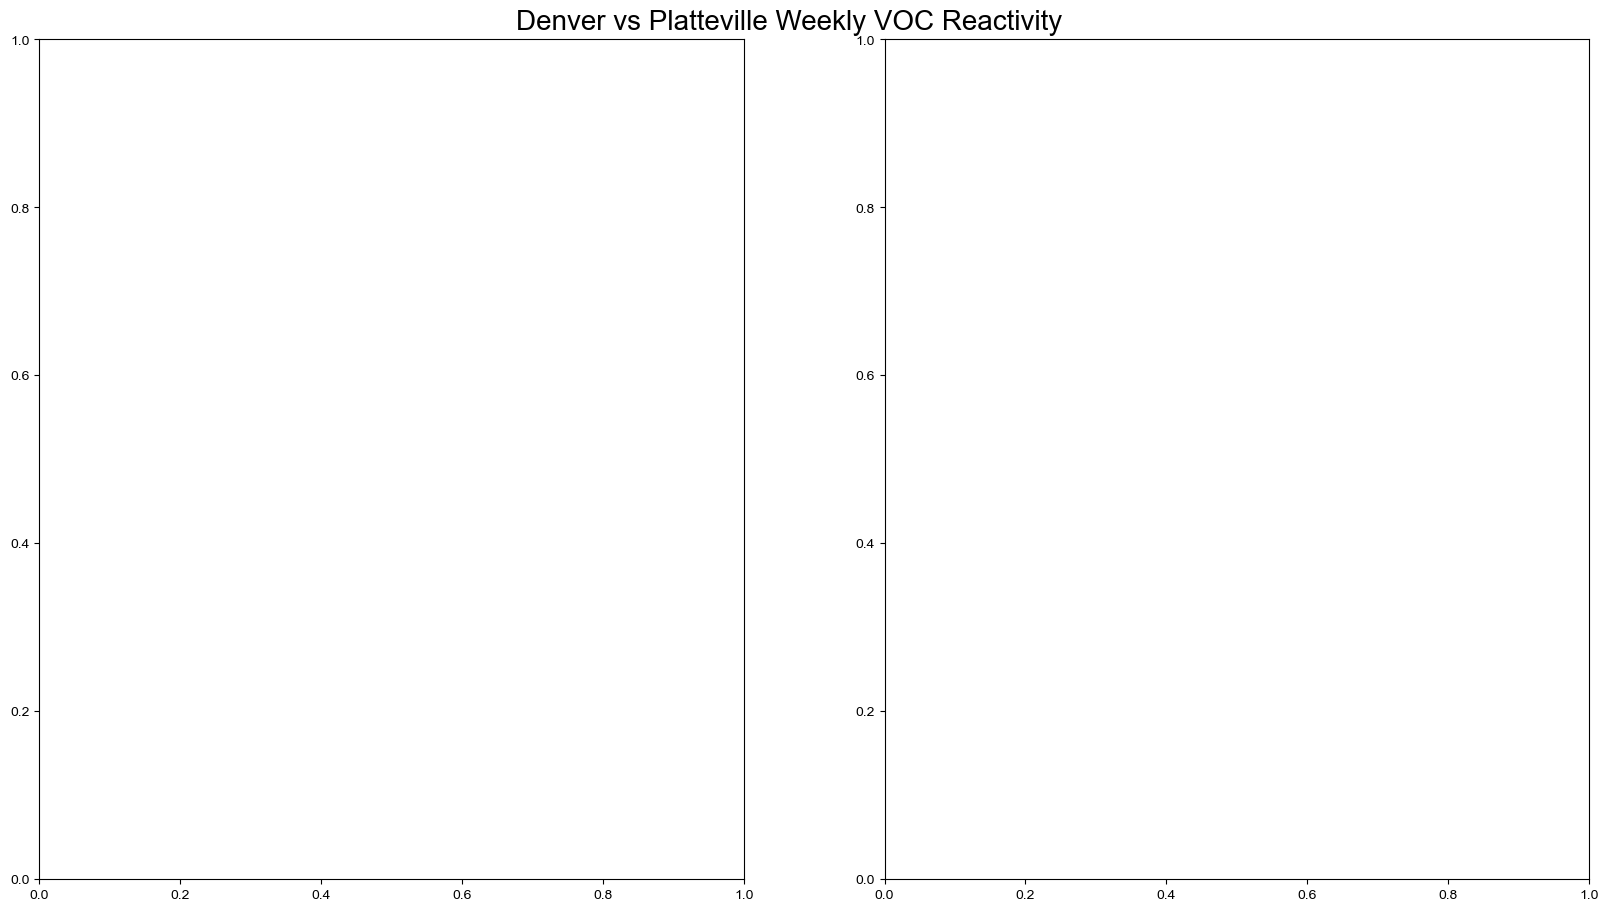

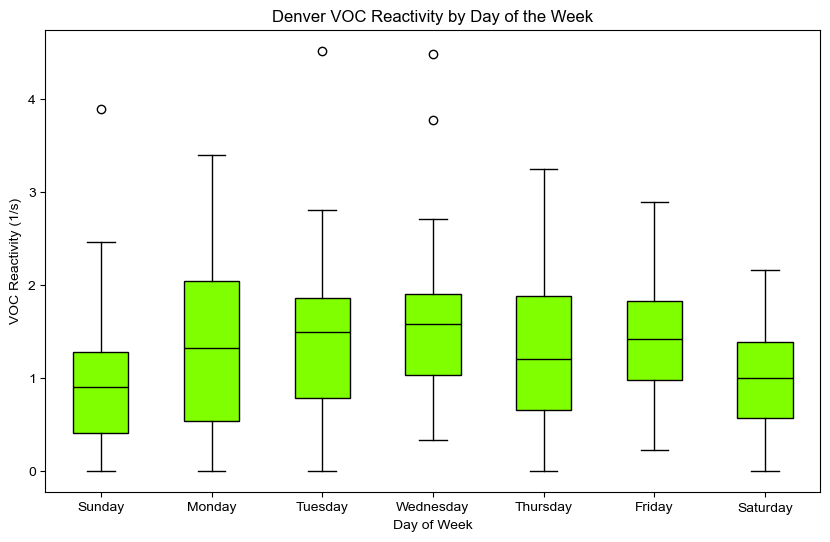

In [21]:
# poster eactivity plost 

fig, axes = plt.subplots(1, 2, figsize = (20,10))
fig.suptitle("Denver vs Platteville Weekly VOC Reactivity", fontsize = 20) #titles page
fig.subplots_adjust(top = 0.95, hspace=0.3) #adds space between title and first plots, and all plots with eachother

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 3rd 2005 was a Tuesday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
dvocrsums

labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

grouped = dvocrsums['Total Reactivities Sum'].groupby(dvocrsums['dayofweek']).apply(np.array) 
#grouped = grouped.apply(remove_nans)

plt.figure(figsize=(10, 6))  

plt.boxplot(grouped, patch_artist = True, boxprops = dict(facecolor = "chartreuse"), medianprops = dict(color = "black"));
plt.xticks(np.arange(1, 8), labels) #makes an array 1 - 7, and matches labels to it

plt.xlabel('Day of Week')
plt.ylabel('VOC Reactivity (1/s)')
#plt.ylim(0, 40000)
plt.title('Denver VOC Reactivity by Day of the Week')
plt.grid(False)
plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_28328\3700694586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)


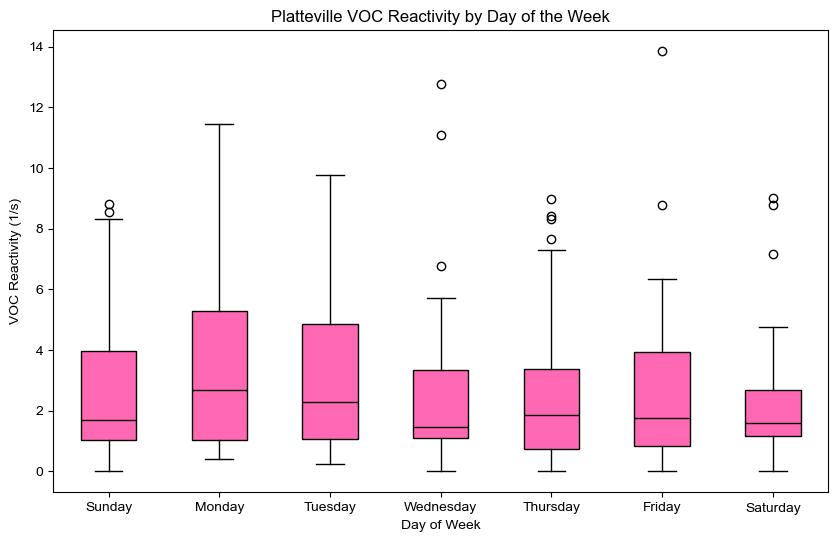

In [22]:
#plot day of week plot for plateville VOC reactivities

# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 3rd 2005 was a Tuesday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)
pvocrsums

labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

#def remove_nans(arr):
#    return arr[~np.isnan(arr)]

pgrouped = pvocrsums['Total Reactivities Sum'].groupby(pvocrsums['dayofweek']).apply(np.array) 
#grouped = grouped.apply(remove_nans)

plt.figure(figsize=(10, 6))  

plt.boxplot(pgrouped, patch_artist = True, boxprops = dict(facecolor = "hotpink"), medianprops = dict(color = "black"));
plt.xticks(np.arange(1, 8), labels) #makes an array 1 - 7, and matches labels to it

plt.xlabel('Day of Week')
plt.ylabel('VOC Reactivity (1/s)')
#plt.ylim(0, 70000)
plt.title('Platteville VOC Reactivity by Day of the Week')
plt.grid(False)
plt.show()

C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\3357049738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\3357049738.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)


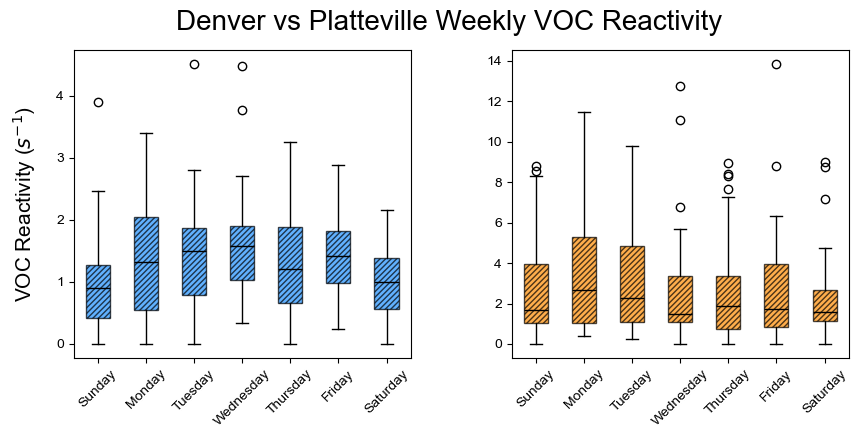

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined dvocrsums and pvocrsums dataframes

# Plot for Denver VOC Reactivities by Day of the Week
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

grouped_d = dvocrsums['Total Reactivities Sum'].groupby(dvocrsums['dayofweek']).apply(np.array)

# Plot for Platteville VOC Reactivities by Day of the Week
pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)
pgrouped = pvocrsums['Total Reactivities Sum'].groupby(pvocrsums['dayofweek']).apply(np.array)

# Create a combined figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot for Denver
ax1.boxplot(grouped_d, patch_artist=True, boxprops=dict(facecolor="dodgerblue", alpha = 0.7, hatch='//////'), medianprops=dict(color="black"))
ax1.set_xticks(np.arange(1, 8))
ax1.set_xticklabels(labels, rotation = 45, fontsize = 10)
#ax1.set_xlabel('Day of Week')
#ax1.set_ylabel('VOC Reactivity (1/s)')
#ax1.set_title('Denver', fontsize = 15)
ax1.grid(False)

# Plot for Platteville
ax2.boxplot(pgrouped, patch_artist=True, boxprops=dict(facecolor="darkorange", alpha = 0.7, hatch='//////'), medianprops=dict(color="black"))
ax2.set_xticks(np.arange(1, 8))
ax2.set_xticklabels(labels, rotation = 45, fontsize = 10)
#ax2.set_xlabel('Day of Week')
#ax2.set_ylabel('VOC Reactivity (1/s)')
#ax2.set_title('Platteville', fontsize = 15)
ax2.grid(False)

#fig.text(0.5, 0.04, 'Day of Week', ha='center', va='center')
#fig.text(0.01, 0.5, 'VOC Reactivity (1/s)', ha='center', va='center', rotation='vertical')

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
#plt.xlabel('Day of Week', labelpad=20)
plt.ylabel('VOC Reactivity ($s^{-1}$)', labelpad=5, fontsize = 15)

fig.suptitle('Denver vs Platteville Weekly VOC Reactivity', fontsize = 20)
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3, hspace=0.95)
# Adjust layout and show the plot
#plt.tight_layout()
plt.show()


C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\1593503683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\1593503683.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)
C:\Users\C837398661\AppData\Local\Temp\ipykernel_3204\1593503683.py:54: UserWarning: Tight layout not applied. The left and right margi

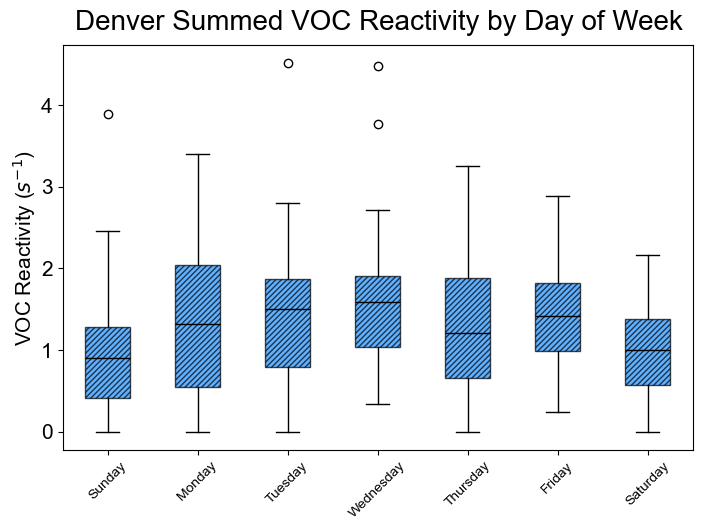

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined dvocrsums and pvocrsums dataframes

# Plot for Denver VOC Reactivities by Day of the Week
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
dvocrsums['dayofweek'] = dvocrsums.index.dayofweek.map(custom_mapping)
labels = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')

grouped_d = dvocrsums['Total Reactivities Sum'].groupby(dvocrsums['dayofweek']).apply(np.array)

# Plot for Platteville VOC Reactivities by Day of the Week
pvocrsums['dayofweek'] = pvocrsums.index.dayofweek.map(custom_mapping)
pgrouped = pvocrsums['Total Reactivities Sum'].groupby(pvocrsums['dayofweek']).apply(np.array)

# Create a combined figure with subplots
#fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(7, 5))
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))


# Plot for Denver
ax1.boxplot(grouped_d, patch_artist=True, boxprops=dict(facecolor="dodgerblue", alpha = 0.7, hatch='//////'), medianprops=dict(color="black"))
ax1.set_xticks(np.arange(1, 8))
ax1.set_xticklabels(labels, rotation = 45, fontsize = 10)
ax1.tick_params(axis='y', labelsize=15)
#ax1.set_xlabel('Day of Week')
#ax1.set_ylabel('VOC Reactivity (1/s)')
#ax1.set_title('Denver', fontsize = 15)
ax1.grid(False)

# Plot for Platteville
#ax2.boxplot(pgrouped, patch_artist=True, boxprops=dict(facecolor="darkorange", alpha = 0.7, hatch='//////'), medianprops=dict(color="black"))
#ax2.set_xticks(np.arange(1, 8))
#ax2.set_xticklabels(labels, rotation = 45, fontsize = 10)
#ax2.set_xlabel('Day of Week')
#ax2.set_ylabel('VOC Reactivity (1/s)')
#ax2.set_title('Platteville', fontsize = 15)
#ax2.grid(False)

#fig.text(0.5, 0.04, 'Day of Week', ha='center', va='center')
#fig.text(0.01, 0.5, 'VOC Reactivity (1/s)', ha='center', va='center', rotation='vertical')

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
#plt.xlabel('Day of Week', labelpad=20)
plt.ylabel('VOC Reactivity ($s^{-1}$)', labelpad=-3, fontsize = 15)

fig.suptitle('Denver Summed VOC Reactivity by Day of Week', fontsize = 20, x=0.452)
#plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.subplots_adjust(wspace=0.3, hspace=0.9)
# Adjust layout and show the plot
plt.tight_layout()
fig.tight_layout(rect=[1, 1, 0, 4])
#plt.show(top = 0.7, hspace=0.4)
#plt.tight_layout()
fig.subplots_adjust(left=0.0, right=0.9, top=0.91, bottom=0.1, wspace=0.2, hspace=0.2)
